# Smoothing Methods Time Series

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#### Load dataset

In [2]:
data=pd.read_csv("us_airline_carrier_passenger.csv")

In [3]:
data.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


#### Data preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       240 non-null    object
 1   passengers  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [5]:
data["month"]=pd.to_datetime(data["month"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month       240 non-null    datetime64[ns]
 1   passengers  240 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


In [6]:
data.dtypes

month         datetime64[ns]
passengers             int64
dtype: object

#### Visualization

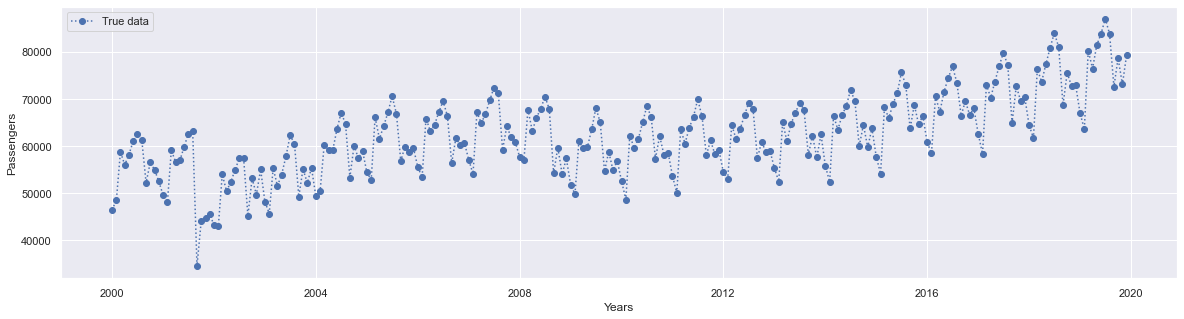

In [7]:
sns.set()
plt.figure(figsize=(20,5))
# sns.lineplot(data=data,x="month",y="passengers","o:")
plt.plot(data["month"],data["passengers"],"o:")
plt.xlabel("Years")
plt.ylabel("Passengers")
plt.legend(["True data"])

#### Split data into train and test data

In [8]:
date="2016-12-31"
data_train=data[data["month"]<=datetime.datetime.strptime(date,"%Y-%m-%d")]
data_train.tail()

,month,passengers
199,2016-08-01,73450
200,2016-09-01,66477
201,2016-10-01,69539
202,2016-11-01,66591
203,2016-12-01,67983


In [9]:
data_test=data[data["month"]>datetime.datetime.strptime(date,"%Y-%m-%d")]
data_test.tail()

,month,passengers
235,2019-08-01,83784
236,2019-09-01,72590
237,2019-10-01,78617
238,2019-11-01,73074
239,2019-12-01,79302


#### Visualization of train and test data

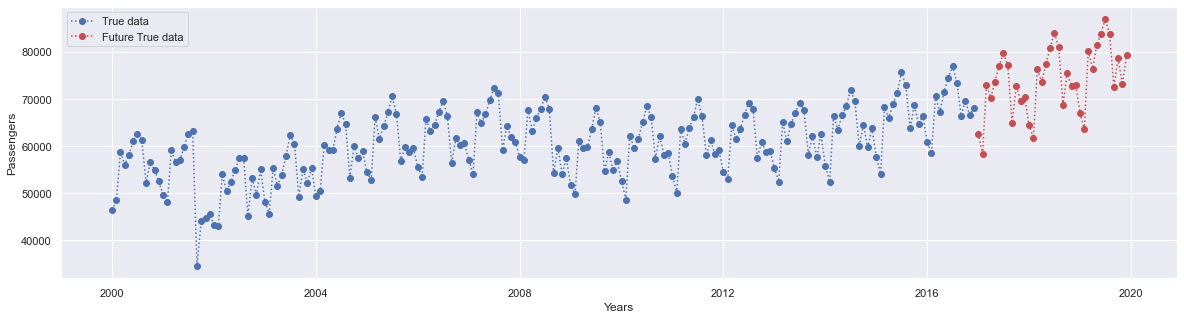

In [10]:
plt.figure(figsize=(20,5))
plt.plot(data_train["month"],data_train["passengers"],"bo:")
plt.plot(data_test["month"],data_test["passengers"],"ro:")
plt.xlabel("Years")
plt.ylabel("Passengers")
plt.legend(["True data","Future True data"])

## Naive Forecasting model
> $ Y_{t}=Y_{t-1} $

In [11]:
data_train["Fitted_values"]=data_train["passengers"].shift()

<ipython-input-11-63ea27db5504>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["Fitted_values"]=data_train["passengers"].shift()


In [12]:
data_train.tail()

,month,passengers,Fitted_values
199,2016-08-01,73450,76886.0
200,2016-09-01,66477,73450.0
201,2016-10-01,69539,66477.0
202,2016-11-01,66591,69539.0
203,2016-12-01,67983,66591.0


In [13]:
data_test["Forecast"]=data_train.iloc[-1,1]
data_test.head()

<ipython-input-13-f9e9ee1973ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast"]=data_train.iloc[-1,1]


,month,passengers,Forecast
204,2017-01-01,62621,67983
205,2017-02-01,58377,67983
206,2017-03-01,72962,67983
207,2017-04-01,70262,67983
208,2017-05-01,73679,67983


In [14]:
## Margin of Error (ME)
error=data_train["passengers"]-data_train["Fitted_values"]
ME=1.96*error.std() # 95% ME
ME

11469.660523364471

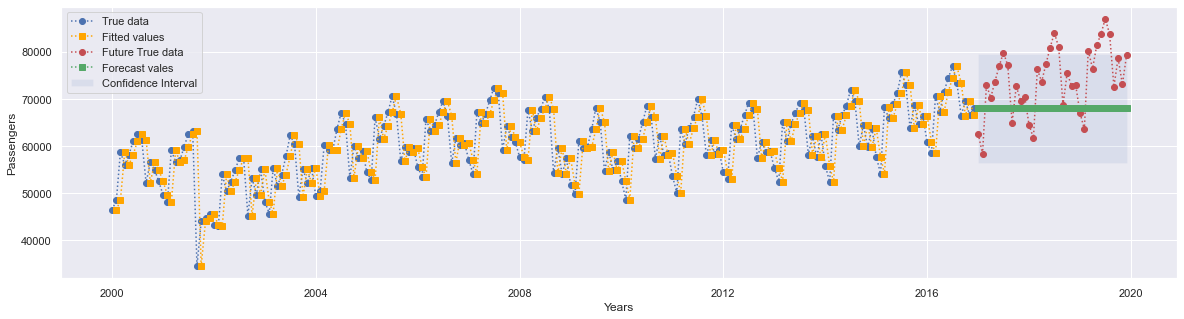

In [15]:
plt.figure(figsize=(20,5))

plt.plot(data_train["month"],data_train["passengers"],"bo:")

# Fitted values
plt.plot(data_train["month"],data_train["Fitted_values"],"s:",color="orange")

plt.plot(data_test["month"],data_test["passengers"],"ro:")

# Forecast vales
plt.plot(data_test["month"],data_test["Forecast"],"s:",color="g")

# Confidence Interval
plt.fill_between(data_test["month"],(data_test["Forecast"]+ME),(data_test["Forecast"]-ME),alpha=0.1)

# # Scaling
# start_date=datetime.datetime.strptime("2014-01-01","%Y-%m-%d")
# end_date=datetime.datetime.strptime("2014-01-01","%Y-%m-%d")
# plt.axis(xmin=start_date,x_max=end_date)

plt.xlabel("Years")
plt.ylabel("Passengers")
plt.legend(["True data","Fitted values","Future True data","Forecast vales","Confidence Interval"])
plt.show()

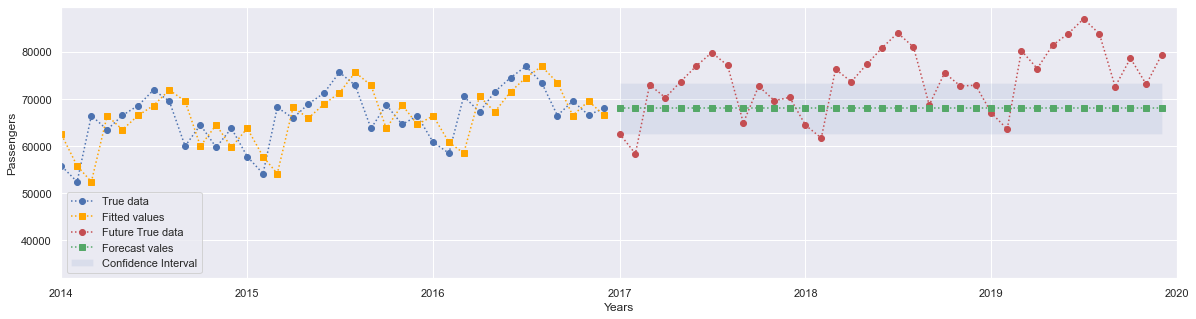

In [45]:
plt.figure(figsize=(20,5))

plt.plot(data_train["month"],data_train["passengers"],"bo:")

# Fitted values
plt.plot(data_train["month"],data_train["Fitted_values"],"s:",color="orange")

plt.plot(data_test["month"],data_test["passengers"],"ro:")

# Forecast vales
plt.plot(data_test["month"],data_test["Forecast"],"s:",color="g")

# Confidence Interval
plt.fill_between(data_test["month"],(data_test["Forecast"]+ME),(data_test["Forecast"]-ME),alpha=0.1)

# Scaling
start_date=datetime.datetime.strptime("2014-01-01","%Y-%m-%d")
end_date=datetime.datetime.strptime("2020-01-01","%Y-%m-%d")
plt.axis(xmin=start_date,xmax=end_date)

plt.xlabel("Years")
plt.ylabel("Passengers")
plt.legend(["True data","Fitted values","Future True data","Forecast vales","Confidence Interval"])
plt.show()

## Simple Moving Average (SMA)


In [17]:
data_train_sma=data_train[["month","passengers"]]
data_test_sma=data_test[["month","passengers"]]

### SMA(3)

In [18]:
# Moving avg of last three terms
data_train_sma["fitted_3"]=data_train_sma.rolling(window=3).mean()
data_train_sma.head()

,month,passengers,fitted_3
0,2000-01-01,46492,NaN
1,2000-02-01,48526,NaN
2,2000-03-01,58764,51260.666667
3,2000-04-01,56033,54441.000000
4,2000-05-01,58201,57666.000000


In [19]:
data_train_sma.tail()

,month,passengers,fitted_3
199,2016-08-01,73450,74946.000000
200,2016-09-01,66477,72271.000000
201,2016-10-01,69539,69822.000000
202,2016-11-01,66591,67535.666667
203,2016-12-01,67983,68037.666667


In [20]:
data_test_sma["Forecast"]=68037.666667

In [21]:
type(data_test_sma["Forecast"])

pandas.core.series.Series

In [22]:
data_test_sma.head()

,month,passengers,Forecast
204,2017-01-01,62621,68037.666667
205,2017-02-01,58377,68037.666667
206,2017-03-01,72962,68037.666667
207,2017-04-01,70262,68037.666667
208,2017-05-01,73679,68037.666667


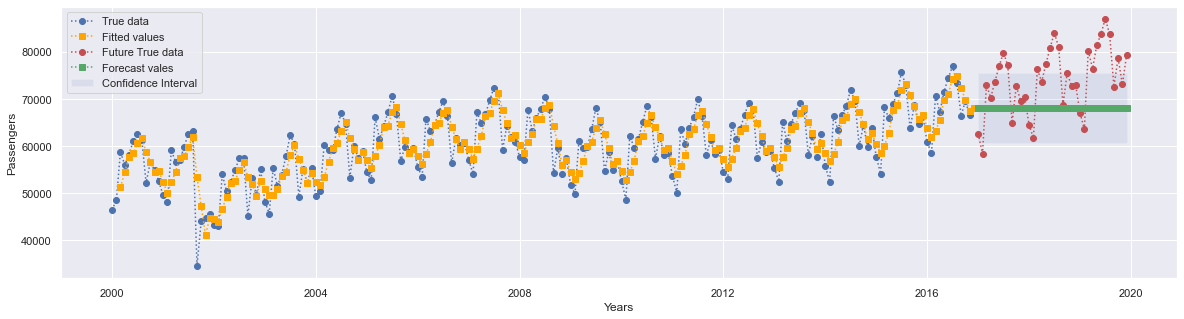

In [23]:
## Margin of Error (ME)
error=data_train_sma["passengers"]-data_train_sma["fitted_3"]
ME=1.96*error.std() # 95% ME

# Visualization
plt.figure(figsize=(20,5))

plt.plot(data_train_sma["month"],data_train_sma["passengers"],"bo:")

# Fitted values
plt.plot(data_train_sma["month"],data_train_sma["fitted_3"],"s:",color="orange")

plt.plot(data_test_sma["month"],data_test_sma["passengers"],"ro:")

# Forecast vales
plt.plot(data_test_sma["month"],data_test_sma["Forecast"],"s:",color="g")

# Confidence Interval
plt.fill_between(data_test_sma["month"],(data_test_sma["Forecast"]+ME),(data_test_sma["Forecast"]-ME),alpha=0.1)

# # Scaling
# start_date=datetime.datetime.strptime("2014-01-01","%Y-%m-%d")
# end_date=datetime.datetime.strptime("2014-01-01","%Y-%m-%d")
# plt.axis(xmin=start_date,x_max=end_date)

plt.xlabel("Years")
plt.ylabel("Passengers")
plt.legend(["True data","Fitted values","Future True data","Forecast vales","Confidence Interval"])
plt.show()

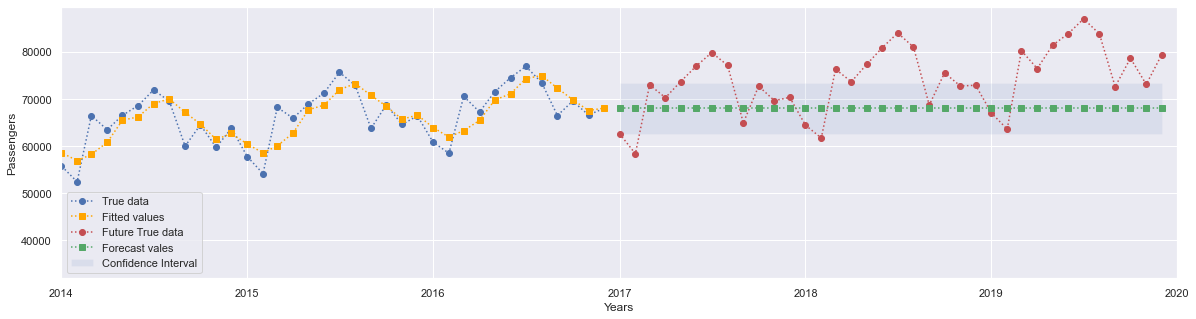

In [44]:
# Visualization
plt.figure(figsize=(20,5))

plt.plot(data_train_sma["month"],data_train_sma["passengers"],"bo:")

# Fitted values
plt.plot(data_train_sma["month"],data_train_sma["fitted_3"],"s:",color="orange")

plt.plot(data_test_sma["month"],data_test_sma["passengers"],"ro:")

# Forecast vales
plt.plot(data_test_sma["month"],data_test_sma["Forecast"],"s:",color="g")

# Confidence Interval
plt.fill_between(data_test_sma["month"],(data_test_sma["Forecast"]+ME),(data_test_sma["Forecast"]-ME),alpha=0.1)

# # Scaling
start_date=datetime.datetime.strptime("2014-01-01","%Y-%m-%d")
end_date=datetime.datetime.strptime("2020-01-01","%Y-%m-%d")
plt.axis(xmin=start_date,xmax=end_date)

plt.xlabel("Years")
plt.ylabel("Passengers")
plt.legend(["True data","Fitted values","Future True data","Forecast vales","Confidence Interval"])
plt.show()

# Weighted Moving Average

In [25]:
data_train_wma=data_train[["month","passengers"]]
data_test_wma=data_test[["month","passengers"]]

### WMA(3)



In [26]:
 (3*58764 + 2*48526 + 1*46492)/(3+2+1)

53306.0

In [27]:
# Defining functions for weighted moving ab=verage
def weighted_moving_avg(X):
  # X should be numpy array
  # print("X is:",X)
  # Generate weights
  weights=np.arange(1,len(X)+1,1)
  # print(weights)
  numerator=np.sum(X*weights)
  denomenator=np.sum(weights)
  wma=numerator/denomenator
  return wma

In [28]:
# Applying WMA to entire data
data_train_wma["fitted_3"]=data_train_wma["passengers"].rolling(window=3).apply(weighted_moving_avg)
data_train_wma["fitted_62"]=data_train_wma["passengers"].rolling(window=62).apply(weighted_moving_avg)

In [29]:
data_train_wma.head()

,month,passengers,fitted_3,fitted_62
0,2000-01-01,46492,NaN,NaN
1,2000-02-01,48526,NaN,NaN
2,2000-03-01,58764,53306.000000,NaN
3,2000-04-01,56033,55692.166667,NaN
4,2000-05-01,58201,57572.166667,NaN


In [30]:
data_train_wma.tail()

,month,passengers,fitted_3,fitted_62
199,2016-08-01,73450,74770.666667,65520.943164
200,2016-09-01,66477,70536.166667,65600.055300
201,2016-10-01,69539,69170.166667,65778.132104
202,2016-11-01,66591,67554.666667,65860.962622
203,2016-12-01,67983,67778.333333,65983.619560


In [31]:
data_test_wma["forcasted_3"]=67778.333333
data_test_wma["forcasted_62"]=65983.619560

#### Plotting for 62 lags

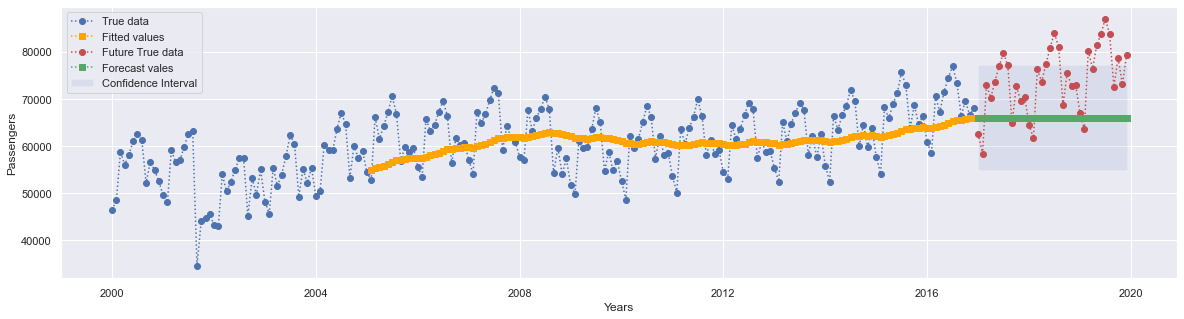

In [32]:
## Margin of Error (ME)
error=data_train_wma["passengers"]-data_train_wma["fitted_62"]
ME=1.96*error.std() # 95% ME

# Visualization
plt.figure(figsize=(20,5))

plt.plot(data_train_wma["month"],data_train_wma["passengers"],"bo:")

# Fitted values
plt.plot(data_train_wma["month"],data_train_wma["fitted_62"],"s:",color="orange")

plt.plot(data_test_wma["month"],data_test_wma["passengers"],"ro:")

# Forecast vales
plt.plot(data_test_wma["month"],data_test_wma["forcasted_62"],"s:",color="g")

# Confidence Interval
plt.fill_between(data_test_wma["month"],(data_test_wma["forcasted_62"]+ME),(data_test_wma["forcasted_62"]-ME),alpha=0.1)

# # Scaling
# start_date=datetime.datetime.strptime("2014-01-01","%Y-%m-%d")
# end_date=datetime.datetime.strptime("2014-01-01","%Y-%m-%d")
# plt.axis(xmin=start_date,x_max=end_date)

plt.xlabel("Years")
plt.ylabel("Passengers")
plt.legend(["True data","Fitted values","Future True data","Forecast vales","Confidence Interval"])
plt.show()

# Exponential Moving Average


In [33]:
data_train_ema=data_train[["month","passengers"]]
data_test_ema=data_test[["month","passengers"]]

In [34]:
data_train_ema.head(2)

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526


In [35]:
# Exponential Moving Average function is already avai;able in pandas
data_train_ema["fitted_ema_3"]=data_train_ema["passengers"].ewm(min_periods=3,alpha=0.5)
print("Before\n",data_train_ema.head())
data_train_ema["fitted_ema_3"]=data_train_ema["passengers"].ewm(min_periods=3,alpha=0.5).mean()
print("After\n",data_train_ema.head())

Before
        month  passengers                                       fitted_ema_3
0 2000-01-01       46492  ExponentialMovingWindow [com=1.0,min_periods=3...
1 2000-02-01       48526  ExponentialMovingWindow [com=1.0,min_periods=3...
2 2000-03-01       58764  ExponentialMovingWindow [com=1.0,min_periods=3...
3 2000-04-01       56033  ExponentialMovingWindow [com=1.0,min_periods=3...
4 2000-05-01       58201  ExponentialMovingWindow [com=1.0,min_periods=3...
After
        month  passengers  fitted_ema_3
0 2000-01-01       46492           NaN
1 2000-02-01       48526           NaN
2 2000-03-01       58764  54085.714286
3 2000-04-01       56033  55124.266667
4 2000-05-01       58201  56712.258065


In [36]:
data_train_ema.head()

,month,passengers,fitted_ema_3
0,2000-01-01,46492,NaN
1,2000-02-01,48526,NaN
2,2000-03-01,58764,54085.714286
3,2000-04-01,56033,55124.266667
4,2000-05-01,58201,56712.258065


In [37]:
data_train_ema.tail()

,month,passengers,fitted_ema_3
199,2016-08-01,73450,73886.632073
200,2016-09-01,66477,70181.816036
201,2016-10-01,69539,69860.408018
202,2016-11-01,66591,68225.704009
203,2016-12-01,67983,68104.352005


In [38]:
data_test_ema["forcast_ema_3_alpha0.5"]=68104.352005

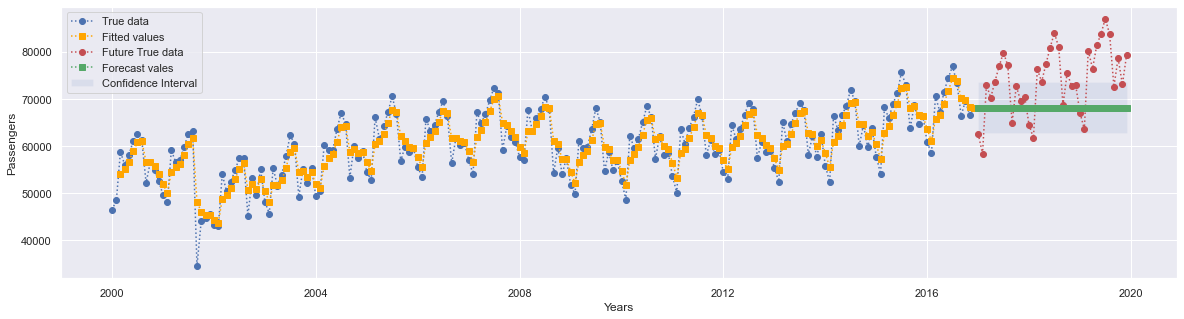

In [39]:
## Margin of Error (ME)
error=data_train_ema["passengers"]-data_train_ema["fitted_ema_3"]
ME=1.96*error.std() # 95% ME

# Visualization
plt.figure(figsize=(20,5))

plt.plot(data_train_ema["month"],data_train_ema["passengers"],"bo:")

# Fitted values
plt.plot(data_train_ema["month"],data_train_ema["fitted_ema_3"],"s:",color="orange")

plt.plot(data_test_ema["month"],data_test_ema["passengers"],"ro:")

# Forecast vales
plt.plot(data_test_ema["month"],data_test_ema["forcast_ema_3_alpha0.5"],"s:",color="g")

# Confidence Interval
plt.fill_between(data_test_ema["month"],(data_test_ema["forcast_ema_3_alpha0.5"]+ME),(data_test_ema["forcast_ema_3_alpha0.5"]-ME),alpha=0.1)

# # Scaling
# start_date=datetime.datetime.strptime("2014-01-01","%Y-%m-%d")
# end_date=datetime.datetime.strptime("2014-01-01","%Y-%m-%d")
# plt.axis(xmin=start_date,x_max=end_date)

plt.xlabel("Years")
plt.ylabel("Passengers")
plt.legend(["True data","Fitted values","Future True data","Forecast vales","Confidence Interval"])
plt.show()

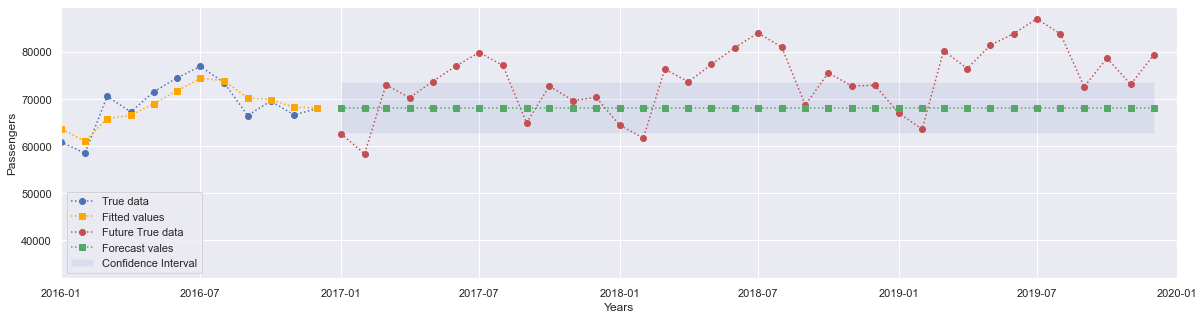

In [43]:
# Visualization
plt.figure(figsize=(20,5))

plt.plot(data_train_ema["month"],data_train_ema["passengers"],"bo:")

# Fitted values
plt.plot(data_train_ema["month"],data_train_ema["fitted_ema_3"],"s:",color="orange")

plt.plot(data_test_ema["month"],data_test_ema["passengers"],"ro:")

# Forecast vales
plt.plot(data_test_ema["month"],data_test_ema["forcast_ema_3_alpha0.5"],"s:",color="g")

# Confidence Interval
plt.fill_between(data_test_ema["month"],(data_test_ema["forcast_ema_3_alpha0.5"]+ME),(data_test_ema["forcast_ema_3_alpha0.5"]-ME),alpha=0.1)

# # Scaling
start_date=datetime.datetime.strptime("2016-01-01","%Y-%m-%d")
end_date=datetime.datetime.strptime("2020-01-01","%Y-%m-%d")
plt.axis(xmin=start_date,xmax=end_date)

plt.xlabel("Years")
plt.ylabel("Passengers")
plt.legend(["True data","Fitted values","Future True data","Forecast vales","Confidence Interval"])
plt.show()